<a href="https://colab.research.google.com/github/fcalvay/lennardjones/blob/main/lennardjones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

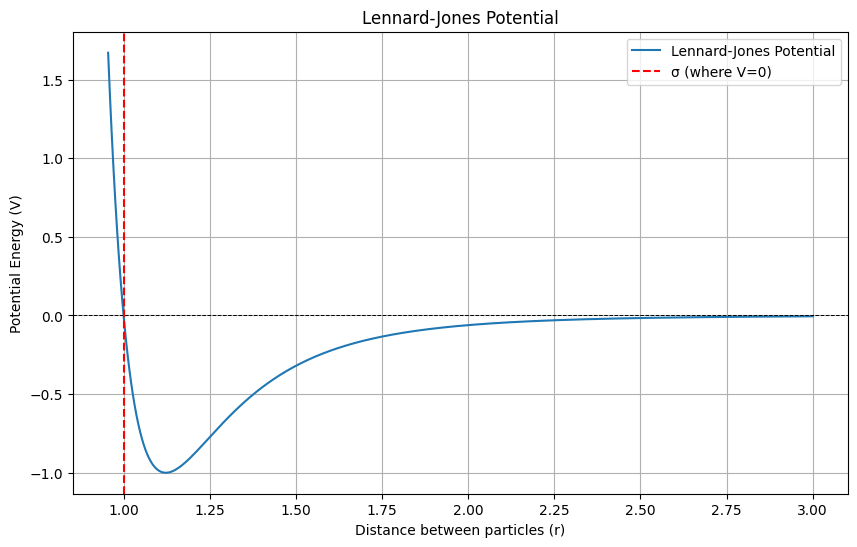

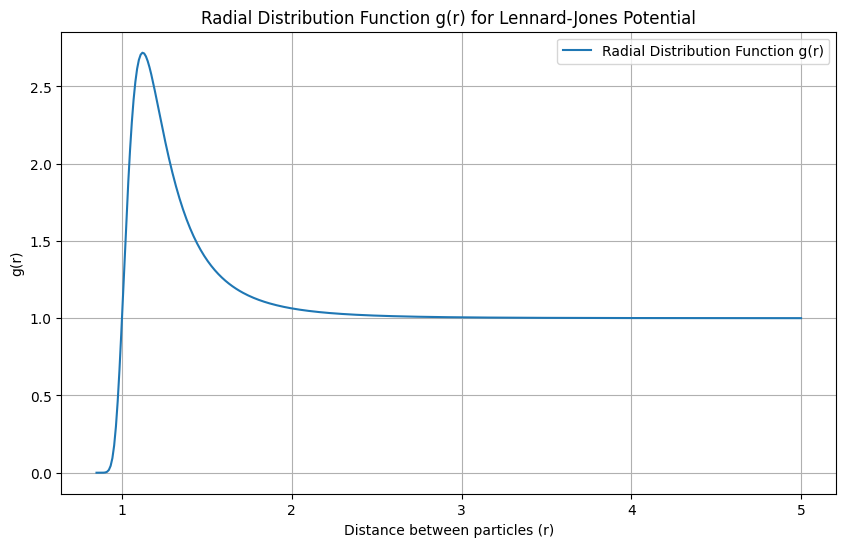

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  4 12:44:51 2024

@author: florentcalvayrac
"""

import numpy as np
import matplotlib.pyplot as plt

# Define the Lennard-Jones potential function
def lennard_jones_potential(r, epsilon=1.0, sigma=1.0):
    """
    Calculate the Lennard-Jones potential for a given distance.

    Parameters:
    - r: distance between particles
    - epsilon: depth of the potential well
    - sigma: distance at which the potential is zero

    Returns:
    - The Lennard-Jones potential at distance r
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate distance values
r = np.linspace(0.95, 3, 400)
r = r[1:]  # remove the zero to avoid division by zero error

# Calculate the potential values
V = lennard_jones_potential(r)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, V, label='Lennard-Jones Potential')
plt.xlabel('Distance between particles (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Lennard-Jones Potential')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(1, color='red', linestyle='--', label='σ (where V=0)')
plt.legend()
plt.grid(True)
plt.show()

def radial_distribution_function(r, beta, epsilon=1.0, sigma=1.0):
    """
    Calculate the radial distribution function g(r) based on the Lennard-Jones potential.

    Parameters:
    - r: distance between particles
    - beta: Inverse temperature (1/kB*T)
    - epsilon: depth of the potential well
    - sigma: distance at which the potential is zero

    Returns:
    - The radial distribution function g(r) at distance r
    """
    V = lennard_jones_potential(r, epsilon, sigma)
    return np.exp(-beta * V)

# Recalculate r to avoid the singularity at r = 0
r = np.linspace(0.85, 5, 400)

# Calculate g(r)
beta=1.0
g_r = radial_distribution_function(r, beta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, g_r, label='Radial Distribution Function g(r)')
plt.xlabel('Distance between particles (r)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) for Lennard-Jones Potential')
plt.grid(True)
plt.legend()
plt.show()

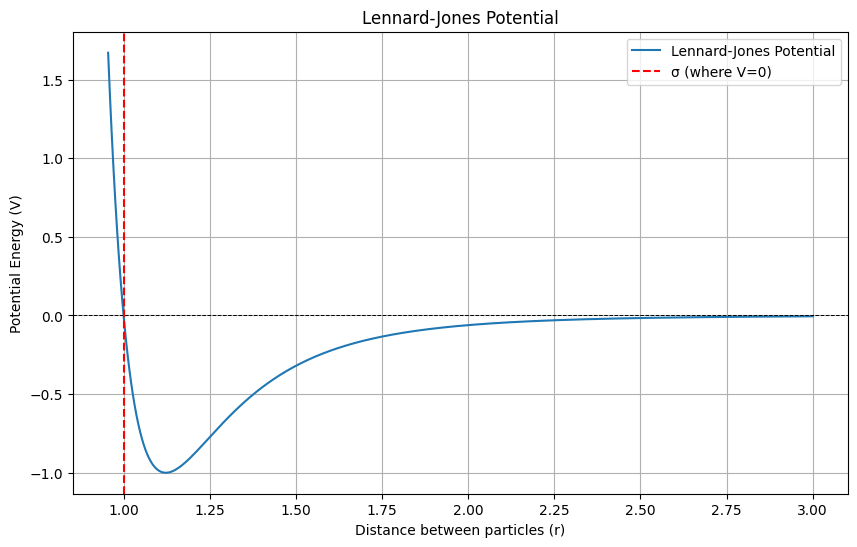

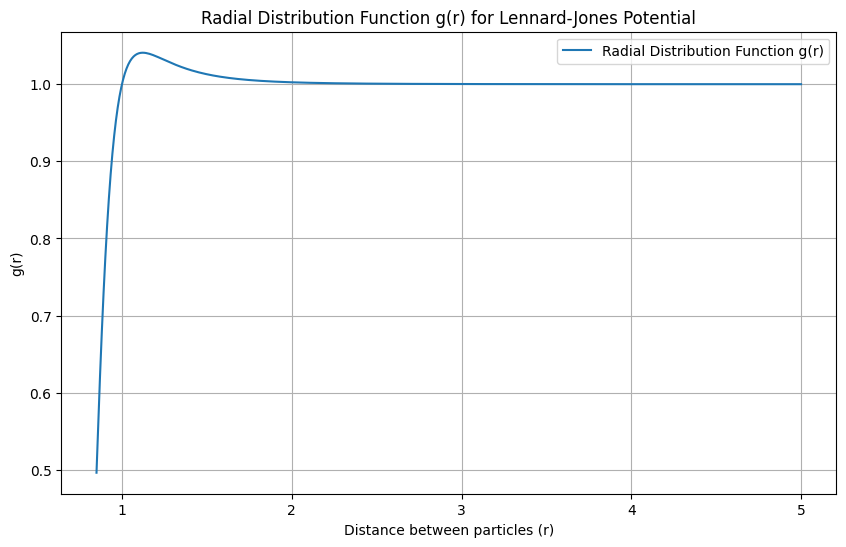

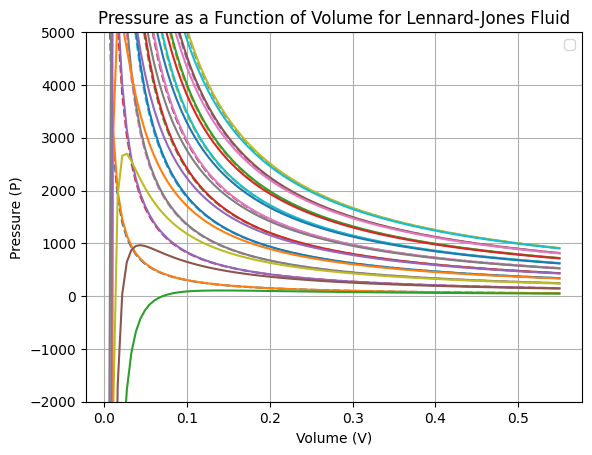

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  4 21:17:29 2024

@author: florentcalvayrac
"""

import numpy as np
import matplotlib.pyplot as plt


beta = 0.04  # Example value for beta

# Define the Lennard-Jones potential function
def lennard_jones_potential(r, epsilon=1.0, sigma=1.0):
    """
    Calculate the Lennard-Jones potential for a given distance.

    Parameters:
    - r: distance between particles
    - epsilon: depth of the potential well
    - sigma: distance at which the potential is zero

    Returns:
    - The Lennard-Jones potential at distance r
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate distance values
r = np.linspace(0.95, 3, 400)
r = r[1:]  # remove the zero to avoid division by zero error

# Calculate the potential values
V = lennard_jones_potential(r)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, V, label='Lennard-Jones Potential')
plt.xlabel('Distance between particles (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Lennard-Jones Potential')
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(1, color='red', linestyle='--', label='σ (where V=0)')
plt.legend()
plt.grid(True)
plt.show()

# Define the radial distribution function g(r)
def radial_distribution_function(r, beta, epsilon=1.0, sigma=1.0):
    """
    Calculate the radial distribution function g(r) based on the Lennard-Jones potential.

    Parameters:
    - r: distance between particles
    - beta: Inverse temperature (1/kB*T)
    - epsilon: depth of the potential well
    - sigma: distance at which the potential is zero

    Returns:
    - The radial distribution function g(r) at distance r
    """
    V = lennard_jones_potential(r, epsilon, sigma)
    return np.exp(-beta * V)

# Recalculate r to avoid the singularity at r = 0
r = np.linspace(0.85, 5, 400)

# Calculate g(r)
g_r = radial_distribution_function(r, beta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, g_r, label='Radial Distribution Function g(r)')
plt.xlabel('Distance between particles (r)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) for Lennard-Jones Potential')
plt.grid(True)
plt.legend()
plt.show()


from scipy.integrate import quad
# Parameters

epsilon = 1.0  # Depth of potential well
sigma = 1.0  # Position where potential is zero

# Integration range
integration_start = 0.85 * sigma  # Start slightly before the potential minimum
integration_end = 5 * sigma  # End beyond the significant influence of the potential

# Perform the integration

# Define a range of density values to calculate the pressure for
V_values = np.linspace(0.005, 0.55,100)
temperatures = np.linspace(30.0, 500.0, 10)
kB = 1.0  # Boltzmann constant in J/K


# Initialize an array to hold the calculated pressure values
P_values = []

def van_der_Waals(T, v,a,b):
    return (T)/(v - b) - b/(v**2)


from math import pi
# Calculate pressure for each density value
for T in temperatures:
    beta = 1/T
    P_values = []
    P_vdW=[]
    for V in V_values:

        P_vW = van_der_Waals(T, V,2/3*pi,0.001)

        rho=1.0/V

        # Integral over the adjusted range for each rho
        integral_result_for_rho, _ = quad(lambda r: (1 - np.exp(-beta * lennard_jones_potential(r, epsilon, sigma))) * r**2,
                                          integration_start, integration_end)
        # Pressure calculation
        P_for_rho = rho + rho**2 / 2 * 4*pi*integral_result_for_rho
        P_values.append(P_for_rho*kB*T)
        P_vdW.append(P_vW)

    P_ideal = 1.0/V_values * kB * T

    plt.ylim(-2000, 5000)
    plt.plot(V_values, P_ideal, '--')

    plt.plot(V_values, P_vdW, '-')


# Plotting

    plt.plot(V_values, P_values)
plt.xlabel('Volume (V)')
plt.ylabel('Pressure (P)')
plt.title('Pressure as a Function of Volume for Lennard-Jones Fluid')
plt.grid(True)
plt.legend()
plt.show()
